Task 5:
# Logistic Regression on Titanic Dataset

Implementing logistics regression on Titanic Dataset

In [17]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [26]:
titanic = fetch_openml('titanic', version=1, as_frame=True)
df = titanic['data']
df['survived'] = titanic['target']
df.head()

f:\Softwares\Anaconda\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    object  
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(5), object(6)
memory usage: 116.8+ KB


In [28]:
df.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


data visualization before pre processing

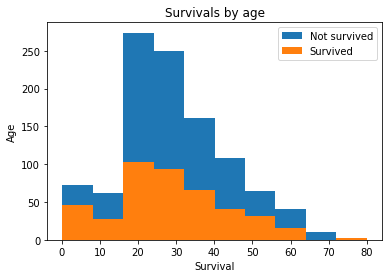

In [29]:
fig, ax = plt.subplots()

ax.hist(df.age.dropna(), label='Not survived')
ax.hist(df['age'][df.survived == '1'].dropna(), label='Survived')

plt.xlabel('Survival')
plt.ylabel('Age')
plt.title('Survivals by age')
plt.legend()
plt.show()

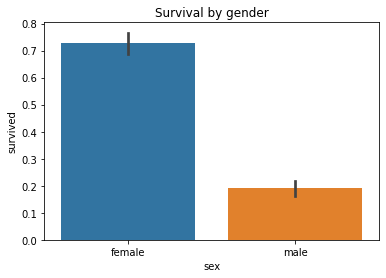

In [30]:
df['survived'] = df.survived.astype('int')
sns.barplot(
    x='sex',
    y='survived',
    data=df
)

plt.title('Survival by gender')
plt.show()

data preprocessing

In [31]:
#data preprocessing
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

In [32]:
df.dropna()
df.drop(['boat', 'body', 'home.dest', 'name', 'ticket', 'cabin'], axis=1, inplace=True)
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1.0,0,29.0000,0.0,0.0,211.3375,0,1
1,1.0,1,0.9167,1.0,2.0,151.5500,0,1
2,1.0,0,2.0000,1.0,2.0,151.5500,0,0
3,1.0,1,30.0000,1.0,2.0,151.5500,0,0
4,1.0,0,25.0000,1.0,2.0,151.5500,0,0


data visualization after preprocessing

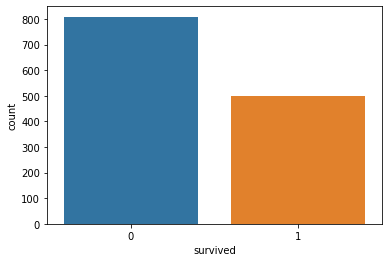

In [33]:
#data visualization
sns.countplot(x='survived', data=df)
plt.show()


            pclass       age     sibsp     parch      fare  survived
pclass    1.000000 -0.377908  0.060832  0.018322 -0.558683 -0.312469
age      -0.377908  1.000000 -0.189972 -0.125851  0.178182 -0.043818
sibsp     0.060832 -0.189972  1.000000  0.373587  0.160349 -0.027825
parch     0.018322 -0.125851  0.373587  1.000000  0.221635  0.082660
fare     -0.558683  0.178182  0.160349  0.221635  1.000000  0.244414
survived -0.312469 -0.043818 -0.027825  0.082660  0.244414  1.000000


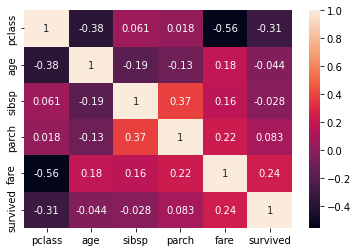

In [34]:

#correlation matrix
corr = df.corr()
print (corr)
sns.heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()


splitting the data

In [35]:
X = df.drop('survived', axis=1)
y = df['survived']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

creating and training the logistic regression model

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

f:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

making prediction and classification report

In [38]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       144
           1       0.83      0.65      0.73       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.77       262
weighted avg       0.79      0.78      0.78       262



In [39]:
# printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)

Confusion matrix: 
 [[128  16]
 [ 41  77]]


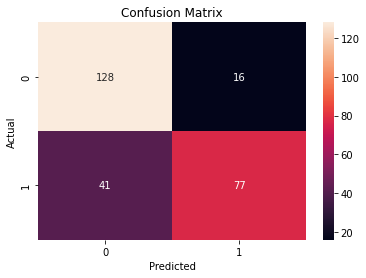

In [40]:
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
#accuracy 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.7824427480916031
